In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [ ]:
df_info = pd.read_csv('DATTAA.csv')

<ipython-input-3-c7ad1bace98e>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_info = pd.read_csv('DATTAA.csv')


In [ ]:
df_info.shape

(103366, 18)

In [ ]:
df_info.info

In [ ]:
df_info.describe()

In [ ]:
df_info.isnull().sum()

In [ ]:
## Correlation
df_info.corr() 

In [ ]:
sns.jointplot(x='current_datetime',y='gas_price_Gwei',kind='scatter',data=df_info)

In [ ]:
df_info.dtypes

In [ ]:
df_info.columns

Index(['current_datetime', 'current_block_number', 'gas_price_Gwei',
       'safe_gas_price', 'ProposeGasPrice', 'fast_gas_price', 'priority_safe',
       'priority_propose', 'priority_fast', 'BaseFee', 'transactions_nbr:',
       'blockreward_ETH;', 'trnx_fees;', 'burnet_fees;', 'blocksize_bytes;',
       'blockgasused:', 'block_base_fee_per_gas_ETH:', 'trx_throughput_TPS:'],
      dtype='object')

In [ ]:
plt.figure(figsize=(16, 13), dpi=100)
features = ['gas_price_Gwei',
       'safe_gas_price', 'ProposeGasPrice', 'fast_gas_price', 'priority_safe',
       'priority_propose', 'priority_fast', 'BaseFee', 'transactions_nbr:',
       'blockreward_ETH;', 'trnx_fees;', 'burnet_fees;', 'blocksize_bytes;',
       'blockgasused:', 'block_base_fee_per_gas_ETH:',
       'trx_throughput_TPS:']
heatmap_data = df_info[features]
corr_matrix = heatmap_data.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12)) # Set the figure size to 10 inches wide and 6 inches tall
plt.scatter(df_info['current_datetime'], df_info['gas_price_Gwei'])
plt.show()

In [ ]:
df_info['blockgasused:'] = df_info['blockgasused:'].str.replace(',', '')
df_info['blockgasused:'] = df_info['blockgasused:'].astype(int)
df_info['blocksize_bytes;'] = df_info['blocksize_bytes;'].str.replace(',', '')
df_info['blocksize_bytes;'] = df_info['blocksize_bytes;'].astype(int)
df_info['current_datetime'] = pd.to_datetime(df_info['current_datetime'] , format='%Y/%m/%d %H:%M:%S')

In [ ]:
# for i in range(0,11000):
#   if(df_info['block_base_fee_per_gas_ETH:'][i]=="2.9542166e-08è"):
df_info['block_base_fee_per_gas_ETH:'][102523]=2.9542166e-08
df_info['block_base_fee_per_gas_ETH:'][102523]
df_info['block_base_fee_per_gas_ETH:']= df_info['block_base_fee_per_gas_ETH:'].astype(float)

<ipython-input-5-996c3a68838c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['block_base_fee_per_gas_ETH:'][102523]=2.9542166e-08


In [ ]:
df_info.index = pd.to_datetime(df_info['current_datetime'], format='%d.%m.%Y %H:%M:%S')
# testdaa.index = pd.to_datetime(testdata['current_datetime'], format='%d.%m.%Y %H:%M:%S')

In [ ]:
def from_normalized_to_normal(normalized_value, min_value, max_value):
    normal_value = (normalized_value * (max_value - min_value)) + min_value
    return normal_value

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
import sklearn

def plot_predictions1(model, X, y, start=11000, end=11400):

  predictions = model.predict(X).flatten()

  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  df1 = pd.DataFrame(index=df.index,columns=['Predictions', 'Actuals'])

  min = data1['gas_price_Gwei'].min()
  max = data1['gas_price_Gwei'].max()

  Ln=[]
  # L=[]
  # Lc=[]
  
  for i in range (0,len(df)):
    df1['Predictions'][i]= from_normalized_to_normal(df.iloc[i]['Predictions'] ,min,max)
    df1['Actuals'][i]= from_normalized_to_normal(df.iloc[i]['Actuals'] ,min,max)
    Ln.append(abs(df1['Predictions'][i] - df1['Actuals'][i]))
    # L.append(abs(df['Predictions'] - df['Actuals']))
  
  plt.figure(figsize=(12,6))
  plt.subplot(2,1,1)
  plt.title('Predictions vs Actuals (Normalized)')
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  plt.legend(['Predictions', 'Actuals'], loc='upper left')

  plt.subplot(2,1,2)
  plt.title('Predictions vs Actuals ')
  plt.plot(df1['Predictions'][start:end])
  plt.plot(df1['Actuals'][start:end])
  plt.legend(['Predictions', 'Actuals'], loc='upper left')

  plt.tight_layout()
  plt.show()

  print('MAE:', metrics.mean_absolute_error(y, predictions))
  print('MSE:', metrics.mean_squared_error(y, predictions))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

  # print(L)
  print(Ln)

  # for i in range(len(L)):
  #   if L[i] > Ln[i]:
  #     Lc.append("a")
  #   else:
  #     Lc.append("b")  
  # print(Lc)
  # print(Lc.count("a"))   
  # print(Lc.count("b"))   


  return df[:],df1[:],Ln

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
import sklearn

def plot_predictions(model, X, y, start=11000, end=11400):

  predictions = model.predict(X).flatten()
  L=[]
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  # df1 = pd.DataFrame(index=df.index,columns=['Predictions', 'Actuals'])

  for i in range (0,len(df)):
    L.append(abs(df['Predictions'][i] - df['Actuals'][i]))

  # min = data1['gas_price_Gwei'].min()
  # max = data1['gas_price_Gwei'].max()
  
  # for i in range (0,len(df)):
  #   df1['Predictions'][i]= from_normalized_to_normal(df.iloc[i]['Predictions'] ,min,max)
  #   df1['Actuals'][i]= from_normalized_to_normal(df.iloc[i]['Actuals'] ,min,max)

  plt.figure(figsize=(12,6))
  plt.subplot(2,1,1)
  plt.title('Predictions vs Actuals ')
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  plt.legend(['Predictions', 'Actuals'], loc='upper left')
  
  # plt.subplot(2,1,2)
  # plt.title('Predictions vs Actuals ')
  # plt.plot(df1['Predictions'][start:end])
  # plt.plot(df1['Actuals'][start:end])
  # plt.legend(['Predictions', 'Actuals'], loc='upper left')

  plt.tight_layout()
  plt.show()
  
  print('MAE:', metrics.mean_absolute_error(y, predictions))
  print('MSE:', metrics.mean_squared_error(y, predictions))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
  print(L)
  return df[:],L

In [ ]:
def df_to_X_y2(df, window_size=9):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
df_info.drop('current_datetime', axis=1, inplace=True)
df_info.drop('current_block_number', axis=1, inplace=True)
# testdata.drop('current_datetime', axis=1, inplace=True)
# testdata.drop('current_block_number', axis=1, inplace=True)

In [ ]:
data1 = df_info[['gas_price_Gwei', 'safe_gas_price', 'ProposeGasPrice', 'fast_gas_price','BaseFee','trnx_fees;', 'burnet_fees;','block_base_fee_per_gas_ETH:','trx_throughput_TPS:']]

In [ ]:
cols=['gas_price_Gwei', 'safe_gas_price', 'ProposeGasPrice', 'fast_gas_price','BaseFee','trnx_fees;', 'burnet_fees;','block_base_fee_per_gas_ETH:','trx_throughput_TPS:']

In [ ]:
import pickle
modelGRU  =pickle.load(open('modeLGRU32_64_32_OR.pkl','rb'))

In [ ]:
import pickle
modelLSTM  =pickle.load(open('modeLLSTM32_048.pkl','rb'))

In [ ]:
sns.pairplot(data1)

In [ ]:
data1


In [ ]:
X4, y4 = df_to_X_y2(data1)
X4.shape, y4.shape

((103357, 9, 9), (103357,))

In [ ]:
X4_test, y4_test =X4[:25840], y4[:25840]
X4_train, y4_train=X4[25841:], y4[25841:]
X4_train.shape, y4_train.shape, X4_test.shape, y4_test.shape

((77516, 9, 9), (77516,), (25840, 9, 9), (25840,))

In [ ]:
X3, y3 = df_to_X_y2(data1)
X3.shape, y3.shape

((103357, 9, 9), (103357,))

In [ ]:
# X3_val, y3_val = X3[67000:70000], y3[67000:70000]
X3_test, y3_test =X3[:25840], y3[:25840]
X3_train, y3_train=X3[25841:], y3[25841:]
X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape

((77516, 9, 9), (77516,), (25840, 9, 9), (25840,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import sklearn
scaler_x = sklearn.preprocessing .MinMaxScaler (feature_range=(0, 1))
scaler_y = sklearn.preprocessing .MinMaxScaler (feature_range=(0, 1))
X3_train = X3_train.reshape(len(X3_train) ,len(cols)*9)
X3_test = X3_test.reshape(len(X3_test) ,len(cols)*9)
y3_train = y3_train.reshape(len(y3_train),1)
y3_test = y3_test.reshape(len(y3_test), 1)
X3_train = scaler_x.fit_transform (X3_train)
y3_train = scaler_y.fit_transform (y3_train)
X3_test = scaler_x.transform (X3_test)
y3_test = scaler_y.transform (y3_test)

In [ ]:
len(X3_train),len(y3_train),len(X3_test),len(y3_test)

(77516, 77516, 25840, 25840)

In [ ]:
X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape

((77516, 81), (77516, 1), (25840, 81), (25840, 1))

In [ ]:
X3_train = X3_train.reshape(77516, 9,9)
X3_test = X3_test.reshape(25840, 9,9)
y3_train = y3_train.reshape(77516, )
y3_test = y3_test.reshape(25840, )

In [ ]:
X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape

((77516, 9, 9), (77516,), (25840, 9, 9), (25840,))

In [ ]:
modelLD = Sequential()
modelLD.add(InputLayer((9, 9)))
modelLD.add(LSTM(units=32, return_sequences=True))
modelLD.add(LSTM(units=64))
modelLD.add(Dense(8, 'relu'))
modelLD.add(Dense(1,'linear'))

In [ ]:
cp1N = ModelCheckpoint('modeLN', save_best_only=True)

In [ ]:
from keras.losses import mean_absolute_error
modelLD.compile(loss=mean_absolute_error, optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
modelLD.fit(X3_train, y3_train, validation_data=(X3_test,y3_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[cp1N,early_stopping])

Epoch 1/200
2423/2423 [==============================] - 16s 6ms/step - loss: 0.0030 - root_mean_squared_error: 0.0067 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0074
Epoch 2/200
2423/2423 [==============================] - 16s 7ms/step - loss: 0.0030 - root_mean_squared_error: 0.0066 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0075
Epoch 3/200
2423/2423 [==============================] - 16s 6ms/step - loss: 0.0030 - root_mean_squared_error: 0.0066 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0074
Epoch 4/200
2423/2423 [==============================] - 16s 6ms/step - loss: 0.0030 - root_mean_squared_error: 0.0066 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0075


In [ ]:
pickle.dump(modelLD,open('modeLLSTM_64_32_NO.pkl','wb'))

808/808 [==============================] - 3s 3ms/step


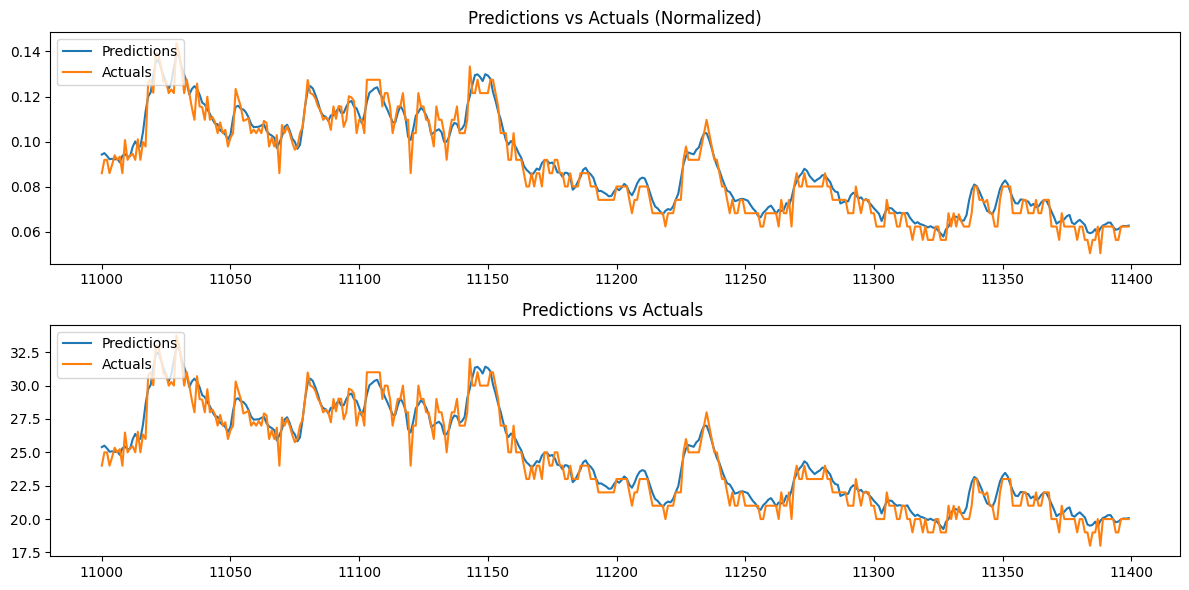

MAE: 0.0038004111842308624
MSE: 5.563058459016692e-05
RMSE: 0.007458591327467065
[0.8372035794300317, 0.3933107746189677, 0.526429009042019, 1.3305475225273042, 0.058952267831049454, 1.1850347705859683, 1.2493604092886876, 0.3083359538110777, 0.22286964559160438, 1.112451323141343, 0.03632944363833701, 0.09962505715683534, 0.056406759927668304, 0.25297557861793507, 1.1563380677275532, 0.5101211642228556, 0.5580450038534615, 0.16655808763469793, 1.1227004011272932, 0.0076570266440860735, 0.8123194789476571, 0.5692662346828818, 0.23537395010216855, 0.2707978870392367, 1.6574667001068804, 0.09903547210866037, 0.15150903590438247, 0.3282394741983694, 0.21767274763121236, 0.9035578269510118, 1.1651898832230572, 0.25285018281478955, 0.3569789375650423, 0.3023706243640447, 1.152430902155956, 0.8416833715011052, 0.5211845584703241, 0.12462297605089745, 0.8909839495895433, 0.6270460010694343, 0.5236131038070013, 0.6690073477694618, 0.681963229265417, 1.1333741785857967, 0.9466258335702733, 0.55

In [ ]:
df,df1,listnLSTM32=plot_predictions1(modelLD, X3_test, y3_test)

In [ ]:
comparison(listL,listnLSTM32)

0.4866073308451078
0.6415114496766806
['a', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'a', '

'model 1 is better'

808/808 [==============================] - 4s 5ms/step


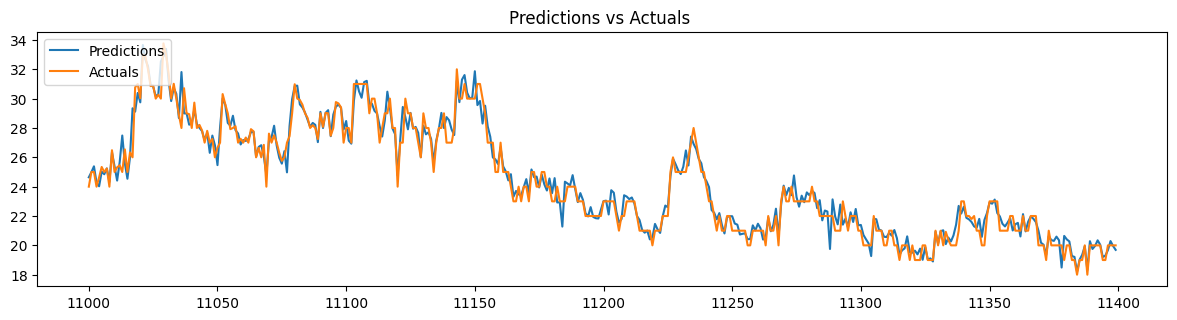

MAE: 0.4866072518274319
MSE: 2.5341291999977225
RMSE: 1.5918948457727107
[0.8509769439697266, 0.7545700073242188, 0.011249542236328125, 1.4854755401611328, 0.6372766494750977, 0.49495697021484375, 1.212677001953125, 0.6376609802246094, 0.04710865020751953, 0.6856546401977539, 0.5441598892211914, 0.11096477508544922, 0.34737586975097656, 0.04142284393310547, 0.2587776184082031, 0.15381813049316406, 0.26885223388671875, 0.9087181091308594, 2.013216018676758, 0.07895278930664062, 0.3461322784423828, 0.018346786499023438, 0.06897926330566406, 0.27496814727783203, 1.469797134399414, 0.45703697204589844, 0.026300430297851562, 0.1544475555419922, 0.19191551208496094, 0.6107292175292969, 0.01666545867919922, 0.45743370056152344, 0.17132949829101562, 0.06342315673828125, 0.6327056884765625, 0.08213424682617188, 0.17669391632080078, 0.26496410369873047, 0.11707260841796874, 0.23380279541015625, 0.3627653121948242, 0.5155318338056638, 0.4629393598857412, 1.2798995971679688, 0.08943367004394531, 0

In [ ]:
df,lista=plot_predictions(model1, X4_test, y4_test)

In [ ]:
def comparison(lista,listl):
  Lc=[]
  for i in range(len(listl)):
      if lista[i] > listl[i]:
        Lc.append("a")
      else:
        Lc.append("b")  
  print(sum(lista)/len(lista))  
  print(sum(listl)/len(listl))    
  print(Lc)
  C1=Lc.count("a")
  C2=Lc.count("b")
  print(C1)
  print(C2)  
  if(C1>C2) :
    return("model 2 is better")
  else:
    return("model 1 is better")  

In [ ]:
modelLDG = Sequential()
modelLDG.add(InputLayer((9, 9)))
modelLDG.add(GRU(units=32, return_sequences=True))
modelLDG.add(GRU(units=64))
modelLDG.add(Dense(8, 'relu'))
modelLDG.add(Dense(1,'linear'))

In [ ]:
cp1G = ModelCheckpoint('modeLG', save_best_only=True)

In [ ]:
from keras.losses import mean_absolute_error
modelLDG.compile(loss=mean_absolute_error, optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
modelGRU.fit(X4_train, y4_train, validation_data=(X4_test,y4_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[early_stopping])

Epoch 1/200
2423/2423 [==============================] - 25s 8ms/step - loss: 0.2976 - root_mean_squared_error: 1.4863 - val_loss: 0.5214 - val_root_mean_squared_error: 1.7354
Epoch 2/200
2423/2423 [==============================] - 19s 8ms/step - loss: 0.2966 - root_mean_squared_error: 1.4820 - val_loss: 0.5117 - val_root_mean_squared_error: 1.7314
Epoch 3/200
2423/2423 [==============================] - 19s 8ms/step - loss: 0.2954 - root_mean_squared_error: 1.4781 - val_loss: 0.5081 - val_root_mean_squared_error: 1.7243
Epoch 4/200
2423/2423 [==============================] - 18s 8ms/step - loss: 0.2943 - root_mean_squared_error: 1.4751 - val_loss: 0.5060 - val_root_mean_squared_error: 1.7178
Epoch 5/200
2423/2423 [==============================] - 18s 7ms/step - loss: 0.2937 - root_mean_squared_error: 1.4722 - val_loss: 0.5104 - val_root_mean_squared_error: 1.7190
Epoch 6/200
2423/2423 [==============================] - 19s 8ms/step - loss: 0.2928 - root_mean_squared_error: 1.4683 -

In [ ]:
modelLDGn = Sequential()
modelLDGn.add(InputLayer((9, 9)))
modelLDGn.add(GRU(units=32, return_sequences=True))
modelLDGn.add(GRU(units=64))
modelLDGn.add(Dense(8, 'relu'))
modelLDGn.add(Dense(1,'linear'))

In [ ]:
cp1Gn = ModelCheckpoint('modeLGNN', save_best_only=True)

In [ ]:
from keras.losses import mean_absolute_error
modelLDGn.compile(loss=mean_absolute_error, optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
modelLDGn.fit(X3_train, y3_train, validation_data=(X3_test,y3_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[cp1Gn,early_stopping])

Epoch 1/200
2418/2423 [============================>.] - ETA: 0s - loss: 0.0324 - root_mean_squared_error: 0.0625

2423/2423 [==============================] - 25s 9ms/step - loss: 0.0323 - root_mean_squared_error: 0.0625 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0196
Epoch 2/200
2417/2423 [============================>.] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0128

2423/2423 [==============================] - 21s 9ms/step - loss: 0.0055 - root_mean_squared_error: 0.0128 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0109
Epoch 3/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0087

2423/2423 [==============================] - 21s 9ms/step - loss: 0.0040 - root_mean_squared_error: 0.0087 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0085
Epoch 4/200
2413/2423 [============================>.] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0074

2423/2423 [==============================] - 24s 10ms/step - loss: 0.0032 - root_mean_squared_error: 0.0074 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0075
Epoch 5/200
2417/2423 [============================>.] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0069

2423/2423 [==============================] - 20s 8ms/step - loss: 0.0028 - root_mean_squared_error: 0.0069 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0069
Epoch 6/200
2423/2423 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0065

2423/2423 [==============================] - 24s 10ms/step - loss: 0.0025 - root_mean_squared_error: 0.0065 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0066
Epoch 7/200
2423/2423 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0062

2423/2423 [==============================] - 21s 9ms/step - loss: 0.0021 - root_mean_squared_error: 0.0062 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0064
Epoch 8/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0061

2423/2423 [==============================] - 21s 9ms/step - loss: 0.0019 - root_mean_squared_error: 0.0061 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0063
Epoch 9/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0061

2423/2423 [==============================] - 21s 9ms/step - loss: 0.0017 - root_mean_squared_error: 0.0061 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0063
Epoch 10/200
2423/2423 [==============================] - 14s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0060 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0064
Epoch 11/200
2415/2423 [============================>.] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0060

2423/2423 [==============================] - 20s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0060 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0063
Epoch 12/200
2423/2423 [==============================] - 15s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0060 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0063
Epoch 13/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0059

2423/2423 [==============================] - 21s 9ms/step - loss: 0.0016 - root_mean_squared_error: 0.0059 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0063
Epoch 14/200
2419/2423 [============================>.] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0059

2423/2423 [==============================] - 20s 8ms/step - loss: 0.0015 - root_mean_squared_error: 0.0059 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0062
Epoch 15/200
2423/2423 [==============================] - 14s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0058 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0062
Epoch 16/200
2423/2423 [==============================] - 15s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0058 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0063
Epoch 17/200
2423/2423 [==============================] - 14s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0057 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0063


In [ ]:
import pickle
pickle.dump(modelLDGn,open('modeLGRU32_64_32_NO.pkl','wb'))

808/808 [==============================] - 2s 3ms/step


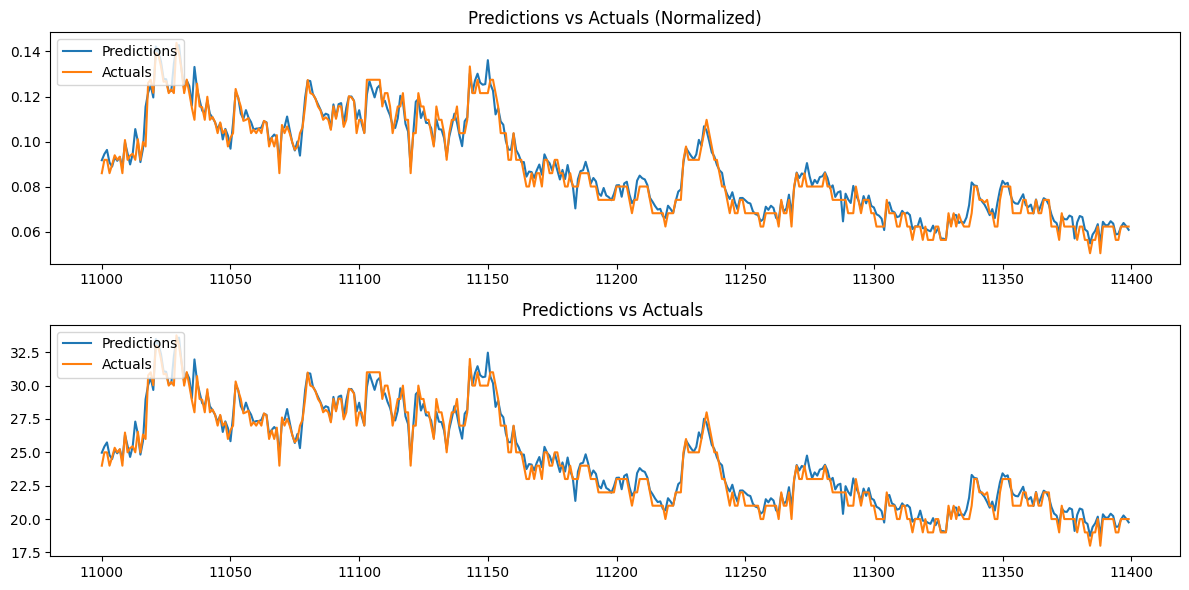

MAE: 0.002646558111222991
MSE: 3.92941242059037e-05
RMSE: 0.006268502548926952
[0.8047150256187052, 0.43129279607949655, 0.06118778193796004, 1.2979828801645148, 0.18523853171959992, 0.6219769744594004, 1.3981531437458443, 0.07062525775458894, 0.1368160092145807, 0.8198650607072402, 0.23928026818617454, 0.15986645837827496, 0.1536561034963455, 0.07572132409778476, 0.24063876181096866, 0.19934973798985922, 0.2771109799197724, 1.0115302552298786, 1.3166714990524646, 0.08676333809112435, 0.45559559828097207, 0.20762238024246216, 0.08691952672505465, 0.16646163794613145, 1.4029372900227557, 0.015396049807851142, 0.1218998992594571, 0.16703487338820722, 0.22074207176076044, 0.7424557255944677, 0.30743798313765325, 0.6236844023757477, 0.2932337098788267, 0.3435074909706337, 0.9349081966454627, 0.5579768316716596, 0.23522806130928586, 0.04260706354927635, 0.11608682256482794, 0.2322874089905298, 0.04107271590000039, 0.43840432854892697, 0.29146797953964665, 1.32354839491002, 0.700837174438966

In [ ]:
df,dff,listGRU32NO=plot_predictions1(modelLDGn, X3_test, y3_test)

In [ ]:
comparison(listGRU32NO,listGR)

In [ ]:
dfG,listL=plot_predictions(modelLSTM, X4_test, y4_test)

In [ ]:
comparison(listL,lista)

0.4866073308451078
0.5081956714470279
['a', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', '

'model 1 is better'

In [ ]:
modelLD1 = Sequential()
modelLD1.add(InputLayer((9, 9)))
modelLD1.add(LSTM(units=50, return_sequences=True,activation='relu'))
modelLD1.add(Dropout(0.2))

modelLD1.add(LSTM(units=60, return_sequences=True,activation='relu'))
modelLD1.add(Dropout(0.3))


modelLD1.add(LSTM(units=80, return_sequences=True,activation='relu'))
modelLD1.add(Dropout(0.4))

modelLD1.add(LSTM(units=80, return_sequences=True,activation='relu'))
modelLD1.add(Dropout(0.4))

modelLD1.add(LSTM(units=120, activation='relu'))
modelLD1.add(Dropout(0.5))

modelLD1.add(Dense(1,'linear'))

In [ ]:
cp2 = ModelCheckpoint('modeLLSTM', save_best_only=True)

In [ ]:
from keras.losses import mean_absolute_error
modelLD1.compile(loss=mean_absolute_error, optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
modelLD1.fit(X3_train, y3_train, validation_data=(X3_test,y3_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[cp2,early_stopping])

In [ ]:
import pickle
pickle.dump(modelLD,open('modeLLSTM32_048.pkl','wb'))

In [ ]:
modelGRU= Sequential()
modelGRU.add(InputLayer((9, 9)))
modelGRU.add(GRU(units=32, return_sequences=True))
modelGRU.add(GRU(units=64))
modelGRU.add(Dense(8, activation='relu'))
modelGRU.add(Dense(1, activation='linear'))
modelGRU.summary()

In [ ]:
cpG = ModelCheckpoint('modelGRU/',save_best_only=True)

In [ ]:
modelGRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
modelGRU.fit(X3_train, y3_train, validation_data=(X3_test,y3_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[cpG,early_stopping])

Epoch 1/200
2422/2423 [============================>.] - ETA: 0s - loss: 1.2403e-04 - root_mean_squared_error: 0.0111

2423/2423 [==============================] - 53s 20ms/step - loss: 1.2401e-04 - root_mean_squared_error: 0.0111 - val_loss: 4.7675e-05 - val_root_mean_squared_error: 0.0069
Epoch 2/200
2422/2423 [============================>.] - ETA: 0s - loss: 2.9919e-05 - root_mean_squared_error: 0.0055

2423/2423 [==============================] - 47s 20ms/step - loss: 2.9916e-05 - root_mean_squared_error: 0.0055 - val_loss: 4.1635e-05 - val_root_mean_squared_error: 0.0065
Epoch 3/200
2423/2423 [==============================] - 38s 16ms/step - loss: 2.4266e-05 - root_mean_squared_error: 0.0049 - val_loss: 5.1474e-05 - val_root_mean_squared_error: 0.0072
Epoch 4/200
2420/2423 [============================>.] - ETA: 0s - loss: 2.0665e-05 - root_mean_squared_error: 0.0045

2423/2423 [==============================] - 46s 19ms/step - loss: 2.0676e-05 - root_mean_squared_error: 0.0045 - val_loss: 3.6547e-05 - val_root_mean_squared_error: 0.0060
Epoch 5/200
2423/2423 [==============================] - 37s 15ms/step - loss: 1.9134e-05 - root_mean_squared_error: 0.0044 - val_loss: 4.7860e-05 - val_root_mean_squared_error: 0.0069
Epoch 6/200
2423/2423 [==============================] - 39s 16ms/step - loss: 1.8470e-05 - root_mean_squared_error: 0.0043 - val_loss: 6.4654e-05 - val_root_mean_squared_error: 0.0080
Epoch 7/200
2422/2423 [============================>.] - ETA: 0s - loss: 1.7656e-05 - root_mean_squared_error: 0.0042

2423/2423 [==============================] - 47s 20ms/step - loss: 1.7654e-05 - root_mean_squared_error: 0.0042 - val_loss: 3.3414e-05 - val_root_mean_squared_error: 0.0058
Epoch 8/200
2423/2423 [==============================] - 37s 15ms/step - loss: 1.6877e-05 - root_mean_squared_error: 0.0041 - val_loss: 3.4298e-05 - val_root_mean_squared_error: 0.0059
Epoch 9/200
2422/2423 [============================>.] - ETA: 0s - loss: 1.5864e-05 - root_mean_squared_error: 0.0040

2423/2423 [==============================] - 45s 19ms/step - loss: 1.5868e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.1037e-05 - val_root_mean_squared_error: 0.0056
Epoch 10/200
2422/2423 [============================>.] - ETA: 0s - loss: 1.6273e-05 - root_mean_squared_error: 0.0040

2423/2423 [==============================] - 47s 19ms/step - loss: 1.6271e-05 - root_mean_squared_error: 0.0040 - val_loss: 3.0428e-05 - val_root_mean_squared_error: 0.0055
Epoch 11/200
2423/2423 [==============================] - 37s 15ms/step - loss: 1.5570e-05 - root_mean_squared_error: 0.0039 - val_loss: 3.2435e-05 - val_root_mean_squared_error: 0.0057
Epoch 12/200
2423/2423 [==============================] - ETA: 0s - loss: 1.5124e-05 - root_mean_squared_error: 0.0039

2423/2423 [==============================] - 47s 19ms/step - loss: 1.5124e-05 - root_mean_squared_error: 0.0039 - val_loss: 2.9842e-05 - val_root_mean_squared_error: 0.0055
Epoch 13/200
2423/2423 [==============================] - 39s 16ms/step - loss: 1.5350e-05 - root_mean_squared_error: 0.0039 - val_loss: 3.0332e-05 - val_root_mean_squared_error: 0.0055
Epoch 14/200
2421/2423 [============================>.] - ETA: 0s - loss: 1.4364e-05 - root_mean_squared_error: 0.0038

2423/2423 [==============================] - 47s 19ms/step - loss: 1.4358e-05 - root_mean_squared_error: 0.0038 - val_loss: 2.8225e-05 - val_root_mean_squared_error: 0.0053
Epoch 15/200
2422/2423 [============================>.] - ETA: 0s - loss: 1.4584e-05 - root_mean_squared_error: 0.0038

2423/2423 [==============================] - 49s 20ms/step - loss: 1.4583e-05 - root_mean_squared_error: 0.0038 - val_loss: 2.7501e-05 - val_root_mean_squared_error: 0.0052
Epoch 16/200
2423/2423 [==============================] - 38s 16ms/step - loss: 1.4640e-05 - root_mean_squared_error: 0.0038 - val_loss: 4.1362e-05 - val_root_mean_squared_error: 0.0064
Epoch 17/200
2419/2423 [============================>.] - ETA: 0s - loss: 1.4296e-05 - root_mean_squared_error: 0.0038

2423/2423 [==============================] - 47s 19ms/step - loss: 1.4291e-05 - root_mean_squared_error: 0.0038 - val_loss: 2.7445e-05 - val_root_mean_squared_error: 0.0052
Epoch 18/200
2423/2423 [==============================] - 40s 16ms/step - loss: 1.4242e-05 - root_mean_squared_error: 0.0038 - val_loss: 2.7695e-05 - val_root_mean_squared_error: 0.0053
Epoch 19/200
2423/2423 [==============================] - 39s 16ms/step - loss: 1.4020e-05 - root_mean_squared_error: 0.0037 - val_loss: 4.3973e-05 - val_root_mean_squared_error: 0.0066
Epoch 20/200
2422/2423 [============================>.] - ETA: 0s - loss: 1.3885e-05 - root_mean_squared_error: 0.0037

2423/2423 [==============================] - 45s 19ms/step - loss: 1.3883e-05 - root_mean_squared_error: 0.0037 - val_loss: 2.6755e-05 - val_root_mean_squared_error: 0.0052
Epoch 21/200
2423/2423 [==============================] - 39s 16ms/step - loss: 1.4335e-05 - root_mean_squared_error: 0.0038 - val_loss: 2.7106e-05 - val_root_mean_squared_error: 0.0052
Epoch 22/200
2423/2423 [==============================] - 39s 16ms/step - loss: 1.3337e-05 - root_mean_squared_error: 0.0037 - val_loss: 2.7235e-05 - val_root_mean_squared_error: 0.0052
Epoch 23/200
2423/2423 [==============================] - ETA: 0s - loss: 1.3990e-05 - root_mean_squared_error: 0.0037

2423/2423 [==============================] - 46s 19ms/step - loss: 1.3990e-05 - root_mean_squared_error: 0.0037 - val_loss: 2.5988e-05 - val_root_mean_squared_error: 0.0051
Epoch 24/200
2423/2423 [==============================] - 37s 15ms/step - loss: 1.3623e-05 - root_mean_squared_error: 0.0037 - val_loss: 2.6016e-05 - val_root_mean_squared_error: 0.0051
Epoch 25/200
2421/2423 [============================>.] - ETA: 0s - loss: 1.3337e-05 - root_mean_squared_error: 0.0037

2423/2423 [==============================] - 47s 19ms/step - loss: 1.3333e-05 - root_mean_squared_error: 0.0037 - val_loss: 2.5782e-05 - val_root_mean_squared_error: 0.0051
Epoch 26/200
2423/2423 [==============================] - 39s 16ms/step - loss: 1.3151e-05 - root_mean_squared_error: 0.0036 - val_loss: 2.9026e-05 - val_root_mean_squared_error: 0.0054
Epoch 27/200
2423/2423 [==============================] - 39s 16ms/step - loss: 1.3671e-05 - root_mean_squared_error: 0.0037 - val_loss: 2.6472e-05 - val_root_mean_squared_error: 0.0051
Epoch 28/200
2423/2423 [==============================] - 39s 16ms/step - loss: 1.3144e-05 - root_mean_squared_error: 0.0036 - val_loss: 2.7088e-05 - val_root_mean_squared_error: 0.0052


In [ ]:
df2,df3,listnG=plot_predictions1(modelGRU, X3_test, y3_test)

In [ ]:
model5 = Sequential()
model5.add(InputLayer((6, 9)))
model5.add(LSTM(32, return_sequences=True))
model5.add(Dropout(0.25))
model5.add(LSTM(32, return_sequences=True))
model5.add(Dropout(0.25))
model5.add(LSTM(32, return_sequences=True))
model5.add(Dropout(0.25))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()

In [ ]:
model8 = Sequential()
model8.add(InputLayer((6, 9)))
model8.add(Conv1D(64, kernel_size=2))
model8.add(Flatten())
model8.add(Dense(8, 'relu'))
model8.add(Dense(1, 'linear'))

model8.summary()

In [ ]:
# setting the seed to achieve consistent and less random predictions at each execution
#np.random.seed(2016)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout



# setting the model architecture
model1=Sequential()
model1.add(InputLayer((6, 9)))
model1.add(LSTM(32,return_sequences=True,activation="relu"))
# model.add(leakyRelu(alpha=0.5))
model1.add(Dropout(0.2))
model1.add(LSTM(32,activation="relu",return_sequences=True))
# model.add(leakyRelu(alpha=0.5))
model1.add(Dropout(0.2))
model1.add(LSTM(32,activation="relu",return_sequences=True))
# model.add(leakyRelu(alpha=0.5))
model1.add(Dropout(0.2))
model1.add(LSTM(32))
# model.add(leakyRelu(alpha=0.5))
model1.add(Dropout(0.2))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

# printing the model summary
model1.summary()

In [ ]:
from keras.optimizers import SGD, Adam

regressorLSTM = Sequential()
# First GRU layer with Dropout regularisation

regressorLSTM.add(InputLayer((9, 9)))
regressorLSTM.add(LSTM(units=128))

regressorLSTM.add(Dense(8, 'relu'))
regressorLSTM.add(Dense(1, 'linear'))



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.losses import mean_absolute_error
early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
# Compiling the RNN
cpB = ModelCheckpoint('modB/', save_best_only=True)
regressorLSTM.compile(loss=mean_absolute_error, optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])




In [ ]:
regressorLSTM.fit(X4_train, y4_train, validation_data=(X4_test,y4_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[cpB,early_stopping])
# optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

Epoch 1/200
2423/2423 [==============================] - 13s 5ms/step - loss: 0.2714 - root_mean_squared_error: 1.4031 - val_loss: 0.4946 - val_root_mean_squared_error: 1.3368
Epoch 2/200
2423/2423 [==============================] - 19s 8ms/step - loss: 0.2698 - root_mean_squared_error: 1.3893 - val_loss: 0.5011 - val_root_mean_squared_error: 1.3236
Epoch 3/200
2416/2423 [============================>.] - ETA: 0s - loss: 0.2685 - root_mean_squared_error: 1.3729

2423/2423 [==============================] - 20s 8ms/step - loss: 0.2684 - root_mean_squared_error: 1.3713 - val_loss: 0.4843 - val_root_mean_squared_error: 1.3033
Epoch 4/200
2413/2423 [============================>.] - ETA: 0s - loss: 0.2696 - root_mean_squared_error: 1.3625

2423/2423 [==============================] - 16s 6ms/step - loss: 0.2694 - root_mean_squared_error: 1.3602 - val_loss: 0.4771 - val_root_mean_squared_error: 1.2895
Epoch 5/200
2423/2423 [==============================] - 12s 5ms/step - loss: 0.2657 - root_mean_squared_error: 1.3522 - val_loss: 0.4804 - val_root_mean_squared_error: 1.2765
Epoch 6/200
2423/2423 [==============================] - 12s 5ms/step - loss: 0.2652 - root_mean_squared_error: 1.3557 - val_loss: 0.4884 - val_root_mean_squared_error: 1.2667
Epoch 7/200
2423/2423 [==============================] - 13s 5ms/step - loss: 0.2642 - root_mean_squared_error: 1.3424 - val_loss: 0.4944 - val_root_mean_squared_error: 1.2585


808/808 [==============================] - 2s 2ms/step


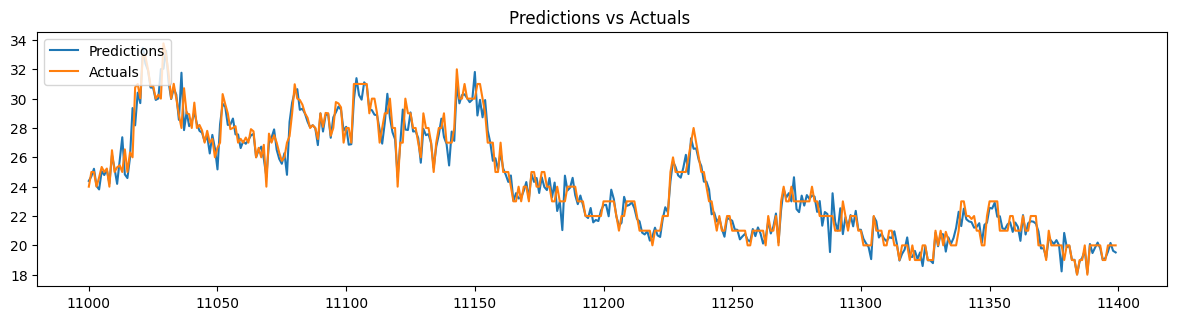

MAE: 0.4943916253966795
MSE: 1.5837298901835455
RMSE: 1.2584633050604
[0.6514568328857422, 1.0553369522094727, 0.048211097717285156, 1.44891357421875, 1.118300437927246, 0.46573352813720703, 1.0472602844238281, 1.0662717819213867, 0.18157291412353516, 0.4690885543823242, 0.8618764877319336, 0.18466472625732422, 0.2022266387939453, 0.33729076385498047, 0.04648780822753906, 0.21150779724121094, 0.3766765594482422, 1.0574827194213867, 2.111919403076172, 0.767059326171875, 0.04657173156738281, 0.22608566284179688, 0.23449993133544922, 0.4002857208251953, 1.4142379760742188, 0.8980064392089844, 0.21378707885742188, 0.11356353759765625, 0.057010650634765625, 0.3986034393310547, 0.3084993362426758, 0.42115020751953125, 0.43616294860839844, 0.027545928955078125, 0.47493743896484375, 0.16655254364013672, 0.3267354965209961, 0.3022336959838867, 0.1327519678540039, 0.3000373840332031, 0.5552511215209961, 0.5415499765058591, 0.019784071189452135, 1.1475906372070312, 0.3282890319824219, 0.429356575

In [ ]:
DF4,listLSTM128=plot_predictions(regressorLSTM, X4_test, y4_test)

In [ ]:
pickle.dump(listLSTM128,open('listLSTM128_OR.pkl','wb'))

In [ ]:
comparison(listLSTM128,listGRU128)

0.49439162539668086
0.48899276351644577
['a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a',

'model 1 is better'

In [ ]:
# The GRU architecture
from keras.optimizers import SGD, Adam

regressorGRU = Sequential()
# First GRU layer with Dropout regularisation

regressorGRU.add(InputLayer((9, 9)))
regressorGRU.add(GRU(units=128))

regressorGRU.add(Dense(8, 'relu'))
regressorGRU.add(Dense(1, 'linear'))



In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
from keras.losses import mean_absolute_error
early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
# Compiling the RNN
cp = ModelCheckpoint('mod&/', save_best_only=True)
regressorGRU.compile(loss=mean_absolute_error, optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])




In [ ]:
regressorGRU.fit(X4_train, y4_train, validation_data=(X4_test,y4_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[cp,early_stopping])
# optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

Epoch 1/200
2421/2423 [============================>.] - ETA: 0s - loss: 0.2702 - root_mean_squared_error: 1.4180

2423/2423 [==============================] - 23s 10ms/step - loss: 0.2701 - root_mean_squared_error: 1.4176 - val_loss: 0.4644 - val_root_mean_squared_error: 1.3947
Epoch 2/200
2423/2423 [==============================] - 14s 6ms/step - loss: 0.2652 - root_mean_squared_error: 1.4102 - val_loss: 0.4732 - val_root_mean_squared_error: 1.3802
Epoch 3/200
2423/2423 [==============================] - 11s 5ms/step - loss: 0.2660 - root_mean_squared_error: 1.4004 - val_loss: 0.4890 - val_root_mean_squared_error: 1.3716
Epoch 4/200
2423/2423 [==============================] - 11s 4ms/step - loss: 0.2645 - root_mean_squared_error: 1.3936 - val_loss: 0.4890 - val_root_mean_squared_error: 1.3544


808/808 [==============================] - 2s 2ms/step


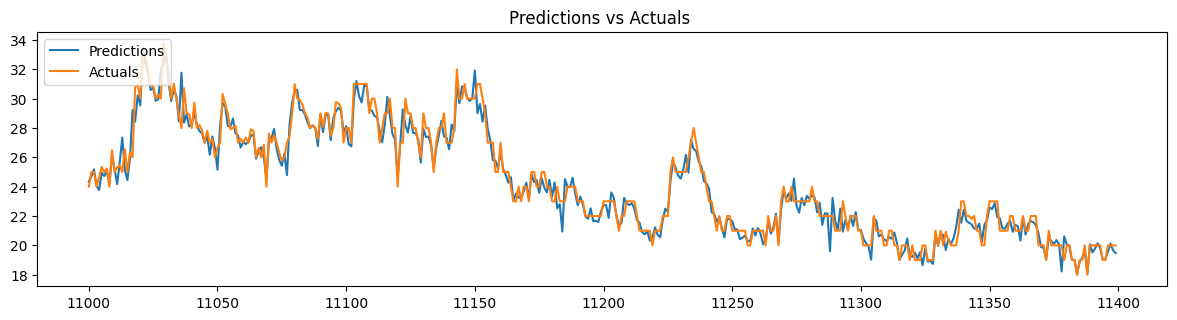

MAE: 0.4889927635164452
MSE: 1.834500250890515
RMSE: 1.3544372450913018
[0.5647430419921875, 0.9816703796386719, 0.10167980194091797, 1.3353557586669922, 0.9386358261108398, 0.3868846893310547, 1.0453567504882812, 0.9260187149047852, 0.20652294158935547, 0.40245819091796875, 0.8526277542114258, 0.2629842758178711, 0.08876991271972656, 0.3031473159790039, 0.011274337768554688, 0.29145240783691406, 0.4636402130126953, 1.101278305053711, 1.8892841339111328, 0.6098728179931641, 0.040843963623046875, 0.273223876953125, 0.2950315475463867, 0.45444583892822266, 1.317739486694336, 0.813140869140625, 0.19295501708984375, 0.153900146484375, 0.07775688171386719, 0.3582897186279297, 0.2894144058227539, 0.33598899841308594, 0.37591552734375, 0.054157257080078125, 0.4797019958496094, 0.11476898193359375, 0.33078670501708984, 0.3514890670776367, 0.19936993355224608, 0.24989700317382812, 0.4775209426879883, 0.4349673349042966, 0.07465658400683495, 1.1938838958740234, 0.1509418487548828, 0.371450424194

In [ ]:
DF3,listGRU128=plot_predictions(regressorGRU, X4_test, y4_test)

In [ ]:
pickle.dump(listGRU128,open('listGRU128_OR.pkl','wb'))

In [ ]:
comparison(listL,listGRU128)

0.4866073308451078
0.48899276351644577
['a', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'b', 

'model 1 is better'

In [ ]:
# The GRU architecture
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3,mode='min')
from keras.optimizers import SGD, Adam
regressorGRU1 = Sequential()
# First GRU layer with Dropout regularisation

regressorGRU1.add(InputLayer((6, 9)))
regressorGRU1.add(GRU(units=32, return_sequences=True, activation='tanh'))
regressorGRU1.add(Dropout(0.2))
# Second GRU layer
regressorGRU1.add(GRU(units=32, return_sequences=True, activation='tanh'))
regressorGRU1.add(Dropout(0.2))
# Third GRU layer
regressorGRU1.add(GRU(units=32, return_sequences=True,activation='tanh'))
regressorGRU1.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU1.add(GRU(units=32, activation='tanh'))
regressorGRU1.add(Dropout(0.2))
# The output layer
# regressorGRU1.add(Dense(units=1))
regressorGRU1.add(Dense(8, 'relu'))
regressorGRU1.add(Dense(1,'linear'))
cp9 = ModelCheckpoint('modeL9/', save_best_only=True)
regressorGRU1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
regressorGRU1.fit(X3_train, y3_train, validation_data=(X3_test,y3_test), epochs=200, batch_size = 32, verbose = 1, callbacks=[cp9,early_stopping])
# optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')


In [ ]:
import pickle
pickle.dump(regressorGRU,open('GRUModel_045_128.pkl','wb'))

In [ ]:
from google.colab import files

# Download the file to your local machine
files.download('dd,.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>